In [1]:
# Linear Regression Analysis in Jupyter Notebook

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import scipy.stats as stats
from sklearn.preprocessing import PolynomialFeatures
from scipy.interpolate import make_interp_spline
import qgridnext as qgrid

In [2]:
# Beispieldaten: Heizenergieverbrauch in Abhängigkeit der Gradzahltage
data = {
    'Monat': ['Januar', 'Februar', 'März', 'April', 'Mai', 'Juni', 'Juli', 'August', 'September', 'Oktober', 'November', 'Dezember'],
    'Gradtage [∑Kd]': [1528.9632, 1417.7266, 1244.8632, 1060.5988, 452.6495,    0, 15.7149, 70.2547, 127.2595, 709.6336, 1248.5608, 1422.9649],
    'Heizenergie [MWh]': [      239,       224,     180.6,     132.9,     71.8, 35.9,    35.4,    37.5,      38.2,     79.7,     180.9, 225.7]
}
dfo = pd.DataFrame(data)
# create dictionary with columnDefs set to specify column headers
gropts = {
    'rowHeaders': False,
    'columnDefs': [
        { 'field': 'id', 'displayName': 'Name' },
        { 'field': 'name', 'displayName': 'Age' }
    ]
}
# Create an editable table
qgrid_widget = qgrid.show_grid(dfo, show_toolbar=False, column_definitions={ 'index': { 'maxWidth': 0, 'minWidth': 0, 'width': 0 }}, grid_options=gropts)
qgrid_widget 

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [3]:
# Separate the independent and dependent variables
df=qgrid_widget.get_changed_df()
df = df.rename(columns={'Gradtage [∑Kd]': 'X','Heizenergie [MWh]': 'Y'})
X = df[['X']]
Y = df['Y']

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, Y)

# Get the model parameters
intercept = model.intercept_
slope = model.coef_[0]

# Make predictions
Y_pred = model.predict(X)

# Calculate R²
r2 = r2_score(Y, Y_pred)    #print(f"R²: {r2}")

In [4]:
# Konfidenzintervall berechnen
confidence = 0.95
n = len(X)
m = X.shape[1]
dof = n - m - 1
t = stats.t.ppf(1 - (1 - confidence) / 2, dof)
sse = np.sum((Y - Y_pred)**2, axis=0)  # Explicitly specifying axis=0
se = np.sqrt(sse / dof) * np.sqrt(1 / n + (X - np.mean(X, axis=0))**2 / np.sum((X - np.mean(X, axis=0))**2, axis=0))

# Confidence bands
ci = t * se.to_numpy().flatten()  # Convert to numpy array and flatten


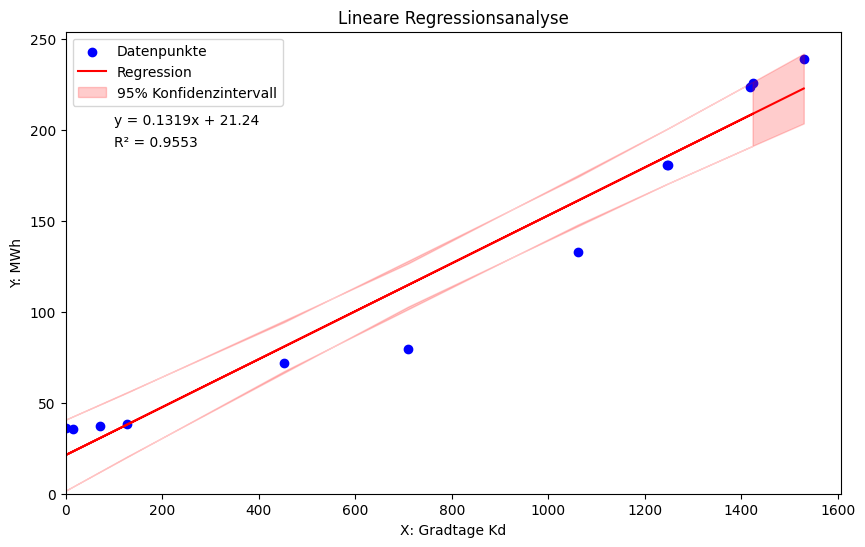

In [5]:
# Regressionsanalyse grafisch darstellen
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Datenpunkte')
plt.plot(X, Y_pred, color='red', label='Regression')
# Plot confidence intervals
plt.fill_between(X.to_numpy().flatten(), (Y_pred - ci), (Y_pred + ci), color='red', alpha=0.2, label='95% Konfidenzintervall')
plt.text(100, 0.85*df['Y'].max(), f'y = {slope:.4f}x + {intercept:.2f} ', fontsize=10, color='black')
plt.text(100, 0.80*df['Y'].max(), f'R² = {r2:.4f}', fontsize=10, color='black')
plt.xlim(0)
plt.ylim(0)
plt.xlabel('X: Gradtage Kd')
plt.ylabel('Y: MWh')
plt.title('Lineare Regressionsanalyse')
plt.legend()
plt.show()

In [6]:
# calculate correlation coefficient and p-value
#from scipy.stats import pearsonr
#corr_coef, p_value = pearsonr(df['X'], df['Y'])
# print the results
#print(f"Correlation coefficient: {corr_coef}")
#print(f"p-value: {p_value}")

In [7]:
# Quadratisch gewichtete Regressionsanalyse
weights = X['X']**2

# Create and fit the linear regression model with weights
model = LinearRegression()
model.fit(X, Y, sample_weight=weights)

# Get the model parameters
intercept = model.intercept_
slope = model.coef_[0]

# Make predictions
Y_pred = model.predict(X)

# Calculate R²
r2 = r2_score(Y, Y_pred, sample_weight=weights) #print(f"R²: {r2}")

In [8]:
# Konfidenzintervall berechnen
confidence = 0.95
n = len(X)
m = X.shape[1]
dof = n - m - 1
t = stats.t.ppf(1 - (1 - confidence) / 2, dof)
sse = np.sum(weights * (Y - Y_pred)**2, axis=0)  # Sum of squared errors with weights, specifying axis=0
se = np.sqrt(sse / dof) * np.sqrt(1 / n + (X - np.mean(X, axis=0))**2 / np.sum((X - np.mean(X, axis=0))**2, axis=0))

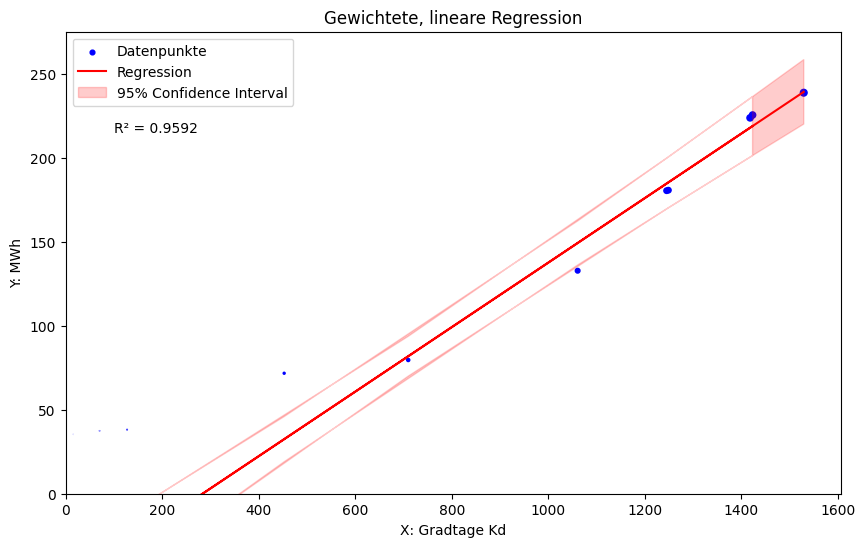

In [9]:
# Regressionsanalyse grafisch darstellen
plt.figure(figsize=(10, 6))
# Use weights to determine the size of the scatter plot points
point_sizes = weights / 100000  # Scaling factor for better visibility
#plt.scatter(X, Y, color='blue', label='Datenpunkte')
plt.scatter(X, Y, color='blue', s=point_sizes, label='Datenpunkte')
plt.plot(X, Y_pred, color='red', label='Regression')

# Plot confidence intervals
plt.fill_between(X.to_numpy().flatten(), (Y_pred - ci), (Y_pred + ci), color='red', alpha=0.2, label='95% Confidence Interval')

# Add slope, intercept, and R² as text in the plot
plt.text(100, 0.90*df['Y'].max(), f'R² = {r2:.4f}', fontsize=10, color='black')

#plt.text(1, y_80, f'Intercept: {intercept:.2f}', fontsize=12, color='red')
#plt.text(1, y_75, f'Slope: {slope:.2f}', fontsize=12, color='red')
#plt.text(1, y_70, f'R²: {r2:.2f}', fontsize=12, color='red')
plt.xlim(0); plt.ylim(0)
plt.xlabel('X: Gradtage Kd')
plt.ylabel('Y: MWh')
plt.title('Gewichtete, lineare Regression')
plt.legend()
plt.show()

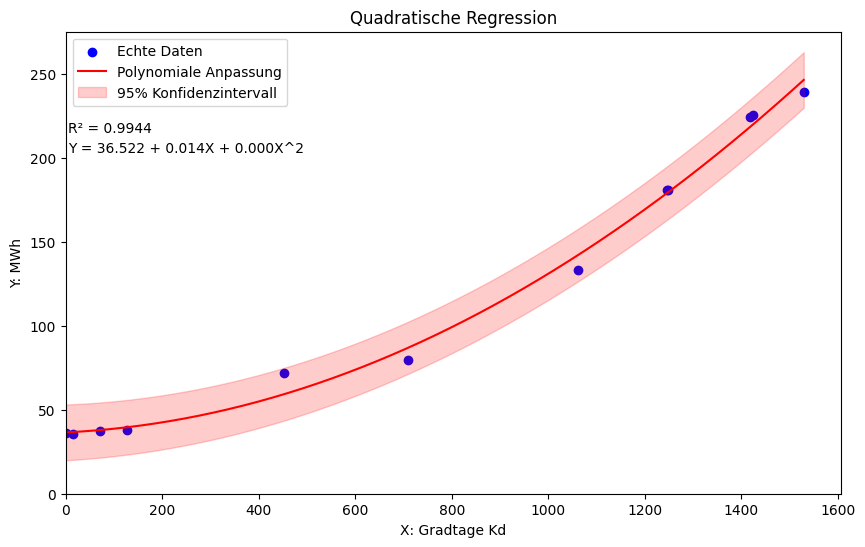

In [10]:
# Transformieren der Daten, um polynomial Merkmale einzuschließen
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit des polynomialen Regressionsmodells
poly_model = LinearRegression()
poly_model.fit(X_poly, Y)

# Vorhersagen machen
Y_poly_pred = poly_model.predict(X_poly)

# Berechnen des R²
r2_poly = r2_score(Y, Y_poly_pred)      #print(f"R² (Polynomial Regression): {r2_poly}")

# Berechnen der Konfidenzbänder
confidence = 0.95
n = len(X)
m = X_poly.shape[1]
dof = n - m
t = stats.t.ppf(1 - (1 - confidence) / 2, dof)
sse = np.sum((Y.to_numpy() - Y_poly_pred)**2, axis=0)  # Summe der quadratischen Fehler
se = np.sqrt(sse / dof) * np.sqrt(1 + (X.to_numpy() - np.mean(X.to_numpy(), axis=0))**2 / np.sum((X.to_numpy() - np.mean(X.to_numpy(), axis=0))**2, axis=0))

# Konfidenzbänder
ci = t * se.flatten()

# Sortieren der Werte für die glättung der Konfidenzbänder
sorted_indices = np.argsort(X.to_numpy().flatten())
X_sorted = X.to_numpy().flatten()[sorted_indices]
ci_sorted = ci[sorted_indices]

# Glätten der polynomialen Vorhersagen
X_smooth = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
X_poly_smooth = poly.fit_transform(X_smooth)
Y_poly_smooth_pred = poly_model.predict(X_poly_smooth)

# Berechnung der geglätteten Konfidenzbänder
ci_smooth = make_interp_spline(X_sorted, ci_sorted)(X_smooth.flatten())

# Plotten der Ergebnisse
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Echte Daten')
plt.plot(X_smooth, Y_poly_smooth_pred, color='red', label='Polynomiale Anpassung')

# Plotten der Konfidenzbänder
plt.fill_between(X_smooth.flatten(), (Y_poly_smooth_pred - ci_smooth), (Y_poly_smooth_pred + ci_smooth), color='red', alpha=0.2, label='95% Konfidenzintervall')

intercept = poly_model.intercept_
coef = poly_model.coef_

# Formel als Text
plt.text(5, 0.90*df['Y'].max(), f'R² = {r2_poly:.4f}', fontsize=10, color='black')
plt.text(5, 0.85*df['Y'].max(),  f'Y = {intercept:.3f} + {coef[1]:.3f}X + {coef[2]:.3f}X^2', fontsize=10, color='black')
plt.xlim(0); plt.ylim(0)
plt.xlabel('X: Gradtage Kd')
plt.ylabel('Y: MWh')
plt.title('Quadratische Regression')
plt.legend()
plt.show()
